# Generating Input

In [161]:
# importing modules
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [162]:
#encoding the messge to vector of -1 and +1...
def toBinary(Str):
  binaryStr = ''.join(format(ord(item), 'b') for item in Str)
  return binaryStr
def toArray(Str):
  output=[]
  for char in Str:
    output.append(ord(char))
  return output

message=toArray(toBinary('IIITBangalore'))
for i in range(len(message)):
  if message[i]==49:
    message[i]=1
  else:
    message[i]=-1
  
s=np.array(message)
s.shape
print(s)

[ 1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1
 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1
 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1  1
 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1]


In [163]:
x=Image.open('earth.jpeg')

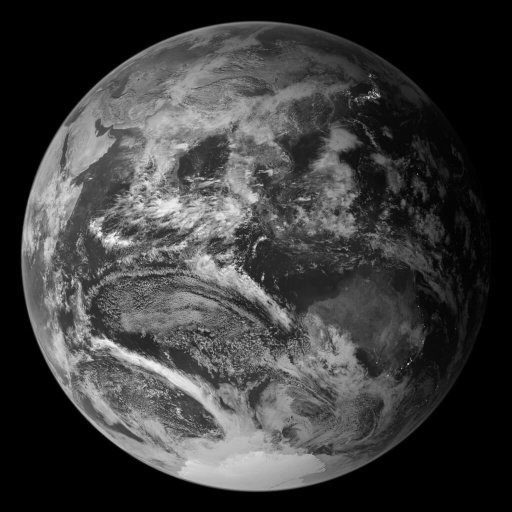

In [164]:
x=x.convert("L")
x

In [165]:
x=np.asarray(x).ravel() #converting image into an vector
x=x/225 # because we need to vectors entries to be b/w 0 and 1

In [166]:
#generating random d vector 
i=s.shape[0]
j=x.shape[0]
d=np.random.randn(i,j)

In [167]:
#normalizing the d vector
d=d/np.linalg.norm(d)


# Encoding the message 

In [168]:
def generateKey(alpha,x,s,d):
  inv_d=np.linalg.pinv(d)
  inter1=np.dot(d,x)
  inter2=np.dot(alpha,s)
  inter3=np.subtract(inter2,inter1)
  z=np.dot(inv_d,inter3)
  return z

z=generateKey(0.1,x,s,d)
z

array([-0.01753387,  0.00105501, -0.00482927, ..., -0.04169975,
        0.02235586,  0.01472321])

In [169]:
def modifyImage(x,z):
  output=x+z
  output=np.array(output)
  for i in range(output.shape[0]):
    if output[i]<0:
      output[i]=0
    elif output[i]>1:
      output[i]=1
  return output

xPlusZ=modifyImage(x,z)
xPlusZ

array([0.        , 0.00105501, 0.        , ..., 0.        , 0.02235586,
       0.01472321])

# View Modified Image

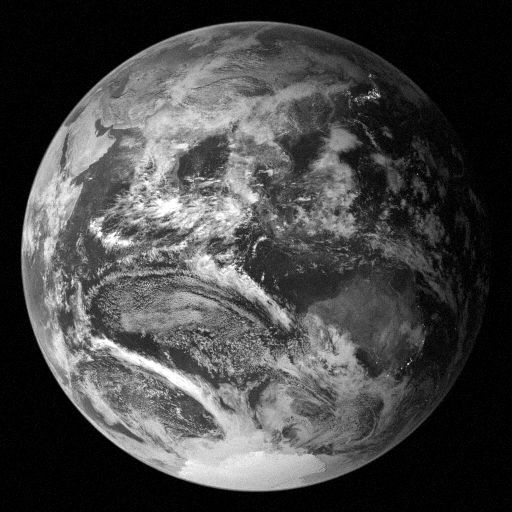

In [170]:
def viewImage(x):
  x=(x*255)
  x=x.astype(np.uint8) #converting float into uint8 image
  x=x.reshape(512,512)
  out=Image.fromarray(x)
  return out

modifiedImage=viewImage(xPlusZ)
modifiedImage# alpha=0.1


# Decode Message

In [171]:
def binaryToDecimal(binary):    
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return (decimal)   

def decodeMessage(d,xPlusZ):
  charArray=[]
  message=np.dot(d,xPlusZ)
  for i in range(message.shape[0]):
    if message[i]>=0: 
      message[i]=1
    else:
      message[i]=0
  message=message.astype('int')
  message="".join(str(x) for x in message)
  for i in range(0, len(message), 7):
    temp_data=int(message[i:i+7])
    decimal_data = binaryToDecimal(temp_data)
    charArray.append(chr(decimal_data))
  return ''.join(charArray)


  

In [172]:
decodeMessage(d,xPlusZ)

'IIITBangalore'

# Checking for  different values of alpha

In [182]:
def Stenography(alpha):
  message=toArray(toBinary('IIITBangalore'))
  for i in range(len(message)):
    if message[i]==49:
      message[i]=1
    else:
      message[i]=-1
  s=np.array(message)
  x=Image.open('earth.jpeg')
  x=x.convert("L")
  x=np.asarray(x).ravel() #converting image into an vector
  x=x/225 # because we need to vectors entries to be b/w 0 and 1
  i=s.shape[0]
  j=x.shape[0]
  d=np.random.randn(i,j)
  #normalizing the d vector
  d=d/np.linalg.norm(d)

  z=generateKey(alpha,x,s,d)
  xPlusZ=modifyImage(x,z)
  
  return (d,xPlusZ)


for alpha=0.05

In [183]:
d,xPlusZ=Stenography(0.05)
m=decodeMessage(d,xPlusZ)
print('Decoded Message :'+str(m))
modifiedImage=viewImage(xPlusZ)

Decoded Message :IIITBangalore


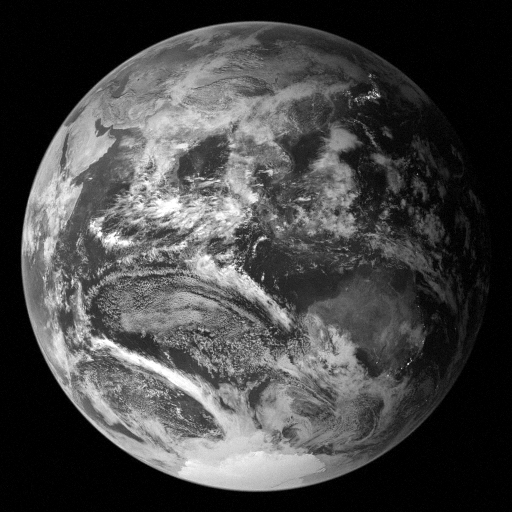

In [184]:
modifiedImage=viewImage(xPlusZ)
modifiedImage

for alpha =0.01

In [185]:
d,xPlusZ=Stenography(0.01)
m=decodeMessage(d,xPlusZ)
print('Decoded Message :'+str(m))
modifiedImage=viewImage(xPlusZ)

Decoded Message :H@xNangclor-


Here we can see that for alpha=0.01 the message is not decoded properly.

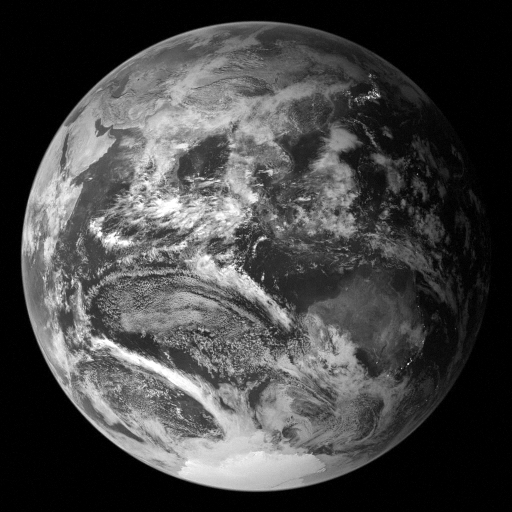

In [186]:
modifiedImage=viewImage(xPlusZ)
modifiedImage